In [1]:
from DP.projected_gradient_ascent import PGA
from DP.linear_solver import LinearSolver
from DP.DP_tester import DP_tester
from DP.utils import print_matrix, binom_optimal_privacy, fisher_information_privatized, reduce_optimal_matrix
import numpy as np

In [2]:
N = 3
EPSILON = 1.0
THETA = 0.5

opt_q, status, history = binom_optimal_privacy(PGA(), N, EPSILON, THETA)
print_matrix(reduce_optimal_matrix(opt_q))
print(status)
print(fisher_information_privatized(opt_q, N, THETA))
print("==================")

opt_q, _, _ = binom_optimal_privacy(LinearSolver(), N, EPSILON, THETA)
print_matrix(opt_q)
print(fisher_information_privatized(opt_q, N, THETA))

row 0: 0.14593617663677824	0.14593669754047847	0.39669640900338515	0.3966970747863829
row 1: 0.7310590903596141	0.7310582889735432	0.26894159628920383	0.2689420516758203
row 2: 0.12300400321980541	0.1230044109625714	0.3343612569297981	0.33436020352631135
Converged after 62 iterations.
1.9219691232836509
row 0: 0.26894142136999516	0.26894142136999516	0.7310585786300049	0.7310585786300049
row 1: 0.7310585786300048	0.7310585786300048	0.2689414213699951	0.2689414213699951
1.921970403306652


4it [00:45, 11.41s/it]


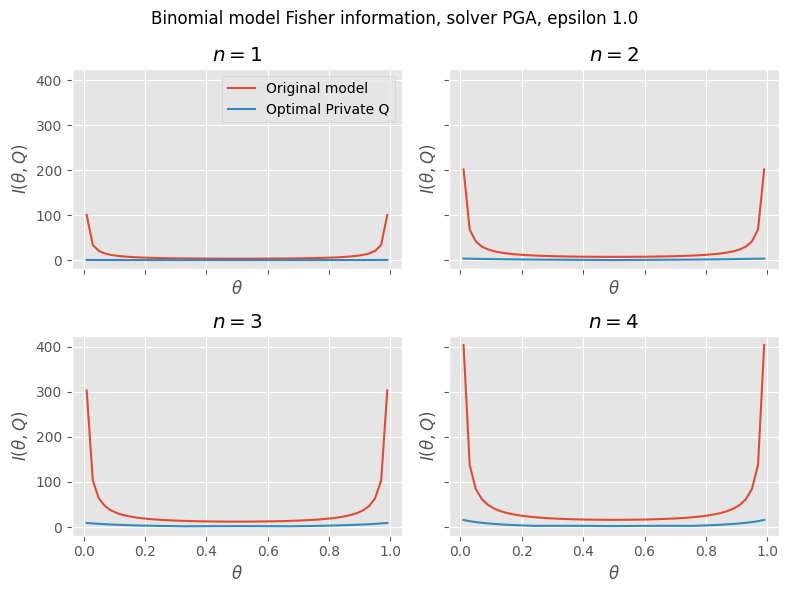

In [3]:
DP_tester.plot_fisher_infos(PGA(), ns=[1, 2, 3, 4], epsilon=1.0)

100%|██████████| 50/50 [00:01<00:00, 33.79it/s]

[]


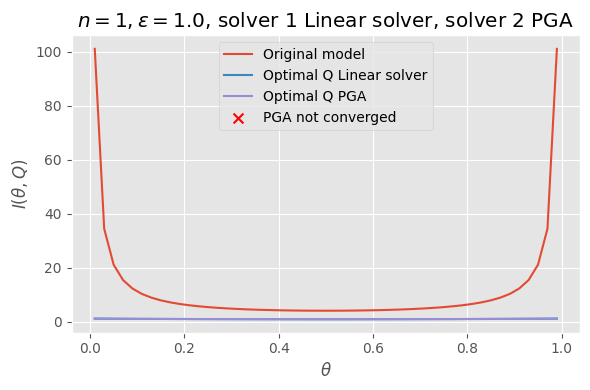

In [4]:
DP_tester.compare_fisher_two_solvers(LinearSolver(), PGA(), 1, 1.0)

100%|██████████| 50/50 [00:05<00:00,  9.23it/s]

[0.01 0.49 0.51 0.99]


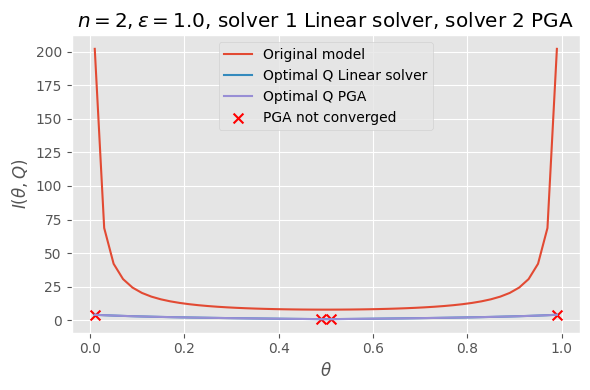

In [5]:
DP_tester.compare_fisher_two_solvers(LinearSolver(), PGA(), 2, 1.0)

100%|██████████| 50/50 [00:16<00:00,  3.06it/s]

[0.01 0.03 0.05 0.09 0.33 0.39 0.51 0.53 0.55 0.57 0.59 0.67 0.89 0.91
 0.93 0.95 0.97]


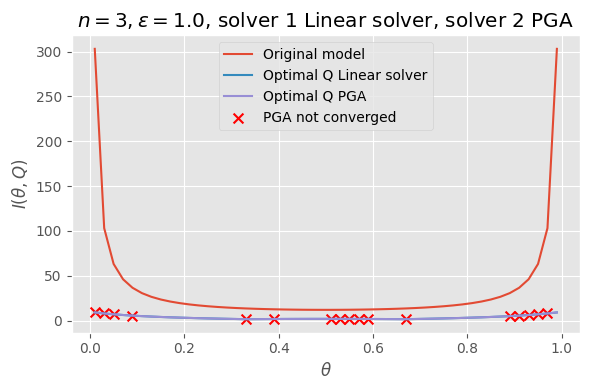

In [6]:
DP_tester.compare_fisher_two_solvers(LinearSolver(), PGA(), 3, 1.0)

 16%|█▌        | 8/50 [00:05<00:30,  1.39it/s]/Users/matej.vedak/Desktop/University of Vienna/Lukas master thesis/locally_efficient_differential_privacy/venv/lib/python3.12/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100%|██████████| 50/50 [00:26<00:00,  1.88it/s]

[0.01 0.03 0.05 0.07 0.09 0.11 0.13 0.15 0.17 0.19 0.25 0.27 0.31 0.35
 0.37 0.49 0.85 0.87 0.89 0.91 0.93 0.95 0.97 0.99]


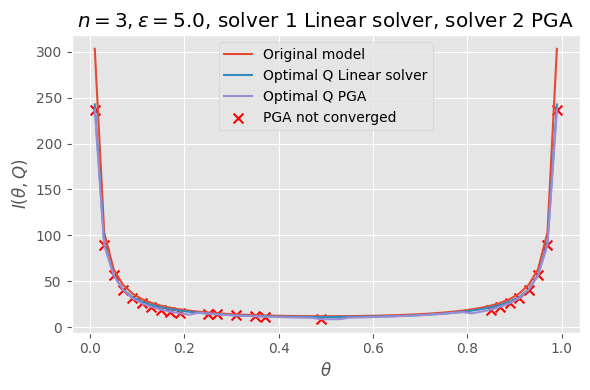

In [7]:
DP_tester.compare_fisher_two_solvers(LinearSolver(), PGA(), 3, 5.0)

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:35<00:00,  1.41it/s]

[0.01 0.03 0.05 0.09 0.11 0.13 0.15 0.17 0.19 0.21 0.23 0.27 0.29 0.31
 0.35 0.39 0.41 0.45 0.53 0.55 0.57 0.59 0.61 0.63 0.65 0.69 0.71 0.73
 0.75 0.77 0.79 0.81 0.83 0.85 0.87 0.89 0.91 0.93 0.95 0.97]


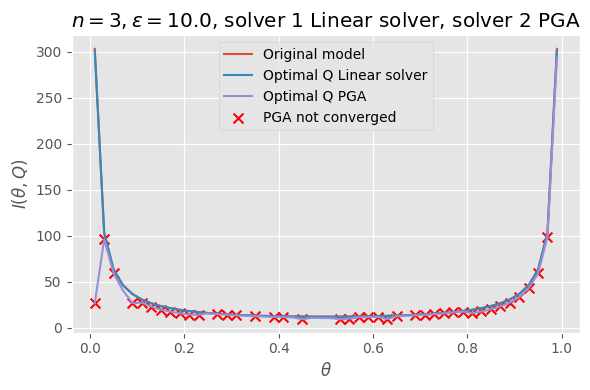

In [8]:
DP_tester.compare_fisher_two_solvers(LinearSolver(), PGA(), 3, 10.0)

10it [2:12:48, 796.85s/it] 


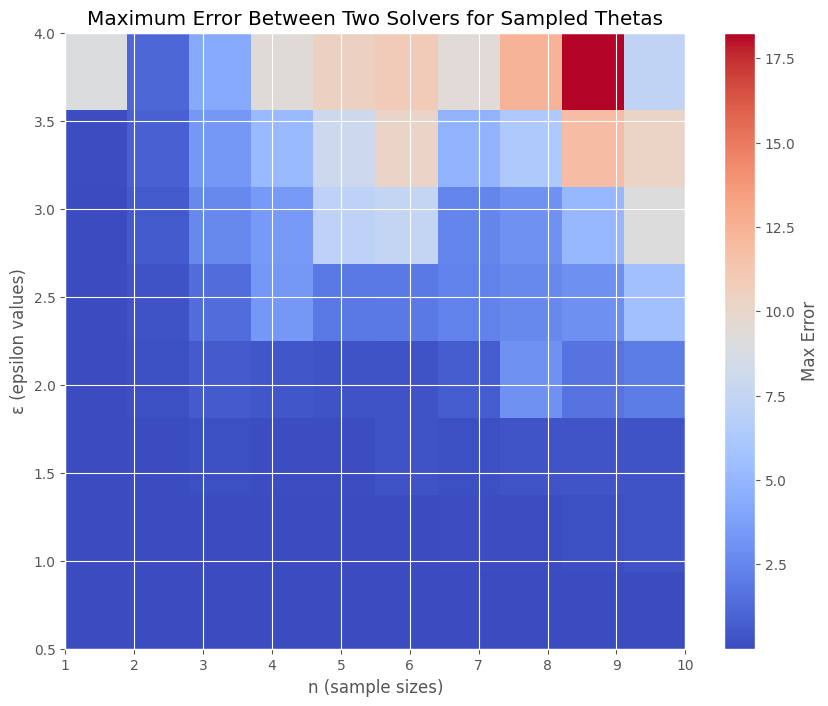

In [9]:
results = DP_tester.max_discrepancy_between_two_solvers(
    LinearSolver(), 
    PGA(), 
    np.arange(10) + 1, 
    [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0], 
    sampled_thetas=20
)

In [10]:
DP_tester.compare_runtimes([LinearSolver(), PGA()], [i for i in range(2, 14)], 0.5, 1.0, log=True)

Calculating for Linear solver


100%|██████████| 12/12 [00:06<00:00,  1.91it/s]


Calculating for PGA


 83%|████████▎ | 10/12 [02:56<01:03, 31.73s/it]

100%|██████████| 50/50 [03:59<00:00,  4.78s/it]

[0.01 0.03 0.05 0.07 0.09 0.11 0.13 0.15 0.17 0.19 0.21 0.23 0.25 0.27
 0.29 0.31 0.33 0.35 0.37 0.39 0.41 0.43 0.45 0.47 0.49 0.51 0.53 0.55
 0.57 0.59 0.61 0.63 0.65 0.67 0.69 0.71 0.73 0.75 0.77 0.79 0.81 0.83
 0.87 0.89 0.91 0.93 0.95 0.97 0.99]


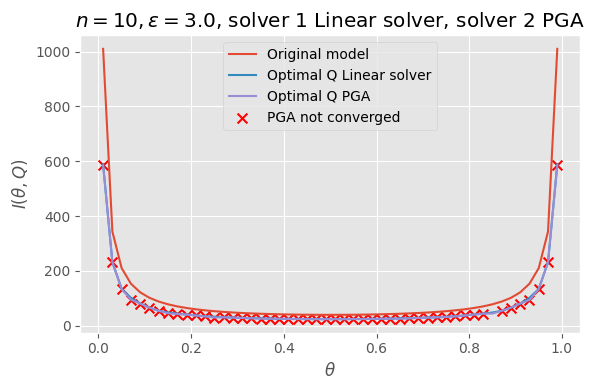

In [11]:
DP_tester.compare_fisher_two_solvers(LinearSolver(), PGA(), 10, 3.0)

100%|██████████| 100/100 [01:29<00:00,  1.12it/s]


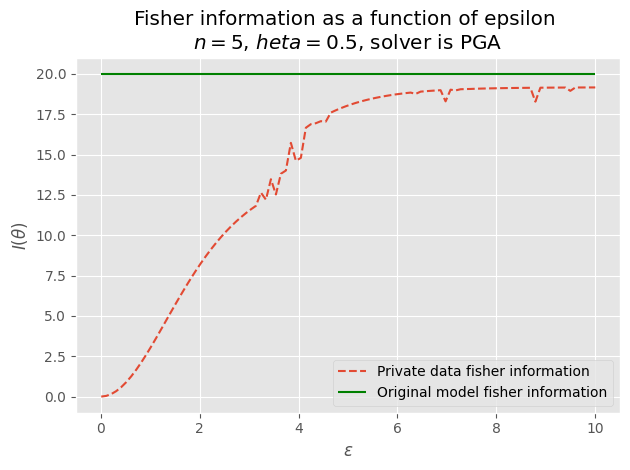

In [12]:
DP_tester.fisher_inf_vs_epsilon(PGA(), 5, 0.5)